In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [16]:
## diccionaries
catalogo = pd.read_excel("../BaseDatos.xlsx", sheet_name="Catalogo")
catalogo = catalogo[["Articulo", "Precio", "Costo", "TiempoVidaAnaquel", "Tamaño_Surtido"]].dropna()
for i in catalogo.columns:
    catalogo.rename(columns={i: i.lower().replace("ñ", "n")}, inplace=True)

catalogo.rename(columns={"articulo":"sku"}, inplace=True)
catalogo["ganancia_uni"] = catalogo["precio"]-catalogo["costo"]
catalogo["pro_ganacia"] = catalogo["ganancia_uni"]/catalogo["costo"]
catalogo = catalogo[["sku", "precio", "costo"]]
catalogo.rename(columns={"sku":"SKU"}, inplace=True)

catalogo.head()

,SKU,precio,costo
0,Art01,7.77,5.44
1,Art02,25.67,15.40
2,Art03,27.23,17.70
3,Art04,20.49,10.25
4,Art05,23.35,16.35


In [4]:
vent_col = ['SKU', 'LOC', 'w_1', 'w_2', 'w_3', 'w_4', 'w_5',
       'w_6', 'w_7', 'w_8', 'w_9', 'w_10', 'w_11', 'w_12' ]

ventas = pd.read_csv("../data/ventas_sku_loc_week.csv")

ventas["week"] = ventas.groupby(["SKU","LOC"]).cumcount()+1
ventas["week"] = ventas["week"].apply(lambda x: "w_"+str(x))

ventas_pivot = ventas.pivot_table(columns="week",values="UNI", index=["SKU", "LOC"]).reset_index()

ventas_pivot= ventas_pivot[vent_col]

In [40]:
ventas_pivot["pre_w_11"] = ventas_pivot[["w_9", "w_10"]].apply(lambda x: np.round(x.mean())+1, axis=1)
ventas_pivot["pre_w_12"] = ventas_pivot[["w_9", "w_10"]].apply(lambda x: np.round(x.mean())+1, axis=1)
ventas_pivot

week,SKU,LOC,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,pre_w_11,pre_w_12
0,Art01,LOC_001,2.0,8.0,2.0,10.0,3.0,14.0,11.0,17.0,9.0,13.0,8.0,6.0,12.0,12.0
1,Art01,LOC_002,9.0,4.0,7.0,6.0,6.0,1.0,3.0,3.0,3.0,8.0,3.0,2.0,7.0,7.0
2,Art01,LOC_003,3.0,8.0,8.0,5.0,6.0,5.0,7.0,4.0,4.0,6.0,9.0,12.0,6.0,6.0
3,Art01,LOC_004,9.0,14.0,4.0,12.0,4.0,15.0,14.0,12.0,9.0,18.0,8.0,12.0,15.0,15.0
4,Art01,LOC_005,12.0,16.0,15.0,11.0,3.0,6.0,9.0,12.0,9.0,6.0,13.0,5.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,Art10,LOC_413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,23.0,1.0,1.0
3925,Art10,LOC_414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0
3926,Art10,LOC_415,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
3927,Art10,LOC_416,3.0,0.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,3.0,1.0,2.0,3.0,3.0


In [41]:
ventas_ganancias= pd.merge(ventas_pivot, catalogo, on="SKU", how="left")
ventas_ganancias["ganacias"] = ventas_ganancias[["precio", "costo"]].apply(lambda x: x[0]-x[1], axis=1)

In [42]:
ventas_ganancias.head()

,SKU,LOC,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,pre_w_11,pre_w_12,precio,costo,ganacias
0,Art01,LOC_001,2.0,8.0,2.0,10.0,3.0,14.0,11.0,17.0,9.0,13.0,8.0,6.0,12.0,12.0,7.77,5.44,2.33
1,Art01,LOC_002,9.0,4.0,7.0,6.0,6.0,1.0,3.0,3.0,3.0,8.0,3.0,2.0,7.0,7.0,7.77,5.44,2.33
2,Art01,LOC_003,3.0,8.0,8.0,5.0,6.0,5.0,7.0,4.0,4.0,6.0,9.0,12.0,6.0,6.0,7.77,5.44,2.33
3,Art01,LOC_004,9.0,14.0,4.0,12.0,4.0,15.0,14.0,12.0,9.0,18.0,8.0,12.0,15.0,15.0,7.77,5.44,2.33
4,Art01,LOC_005,12.0,16.0,15.0,11.0,3.0,6.0,9.0,12.0,9.0,6.0,13.0,5.0,9.0,9.0,7.77,5.44,2.33


In [43]:
def mse(actual, pred, w): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(w*np.subtract(actual,pred)).mean() 

In [44]:
ventas_ganancias["error_pon_w11"] = ventas_ganancias[["w_11", "pre_w_11", "costo"]].apply(lambda x: (x[0]-x[1])*x[2], axis=1)
ventas_ganancias["error_pon_w12"] = ventas_ganancias[["w_12", "pre_w_12", "costo"]].apply(lambda x: (x[0]-x[1])*x[2], axis=1)


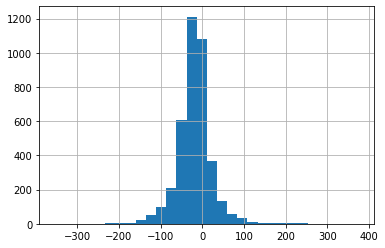

In [45]:
ventas_ganancias["error_pon_w11"].hist(bins=30)

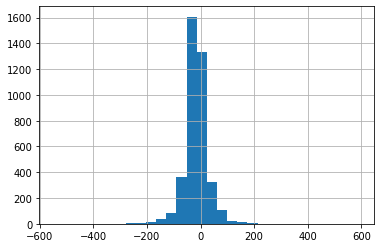

In [46]:
ventas_ganancias["error_pon_w12"].hist(bins=30)

In [47]:
ventas_ganancias.sort_values("error_pon_w12")

,SKU,LOC,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,...,w_10,w_11,w_12,pre_w_11,pre_w_12,precio,costo,ganacias,error_pon_w11,error_pon_w12
2087,Art06,LOC_217,95.0,128.0,73.0,85.0,86.0,75.0,70.0,79.0,...,70.0,84.0,62.0,85.0,85.0,29.58,23.66,5.92,-23.66,-544.18
1041,Art03,LOC_217,119.0,143.0,85.0,114.0,149.0,140.0,120.0,99.0,...,109.0,109.0,114.0,129.0,129.0,27.23,17.70,9.53,-354.00,-265.50
490,Art02,LOC_083,15.0,12.0,12.0,27.0,15.0,26.0,29.0,29.0,...,28.0,28.0,14.0,30.0,30.0,25.67,15.40,10.27,-30.80,-246.40
3553,Art10,LOC_041,16.0,19.0,17.0,8.0,16.0,14.0,18.0,24.0,...,21.0,31.0,13.0,25.0,25.0,29.32,20.52,8.80,123.12,-246.24
2128,Art06,LOC_258,5.0,7.0,4.0,3.0,6.0,2.0,4.0,7.0,...,8.0,5.0,1.0,11.0,11.0,29.58,23.66,5.92,-141.96,-236.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,Art06,LOC_084,11.0,16.0,7.0,10.0,16.0,14.0,17.0,13.0,...,12.0,20.0,24.0,11.0,11.0,29.58,23.66,5.92,212.94,307.58
2123,Art06,LOC_253,14.0,16.0,33.0,10.0,9.0,7.0,7.0,5.0,...,5.0,17.0,21.0,7.0,7.0,29.58,23.66,5.92,236.60,331.24
1870,Art05,LOC_420,75.0,68.0,0.0,50.0,66.0,84.0,84.0,20.0,...,43.0,62.0,66.0,39.0,39.0,23.35,16.35,7.00,376.05,441.45
3924,Art10,LOC_413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,23.0,1.0,1.0,29.32,20.52,8.80,61.56,451.44


### MSE para las últimas dos semanas

In [50]:
mse(ventas_ganancias.w_11, ventas_ganancias.pre_w_11, ventas_ganancias.ganacias)

557.4005571901208

In [51]:
mse(ventas_ganancias.w_12, ventas_ganancias.pre_w_12, ventas_ganancias.ganacias)

586.6993454059535